In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')


In [6]:
# Load the Titanic dataset
df = pd.read_csv('/content/titanic_train_5c8b4db5-b8d9-466e-9f85-9975a280369d.csv')

In [7]:
# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
display(df.head())

print("\nDataset Info:")
df.info()

print("\nMissing values:")
print(df.isnull().sum())

Dataset Shape: (891, 12)

First few rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Emb

In [8]:
# 1. Create family size features
# =============================

# Traditional family size (SibSp + Parch + 1)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Ticket-based family size
family_by_ticket = df.groupby('Ticket').size().reset_index()
family_by_ticket.columns = ['Ticket', 'FamilyMembersByTicket']
df = df.merge(family_by_ticket, on='Ticket', how='left')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FamilyMembersByTicket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1


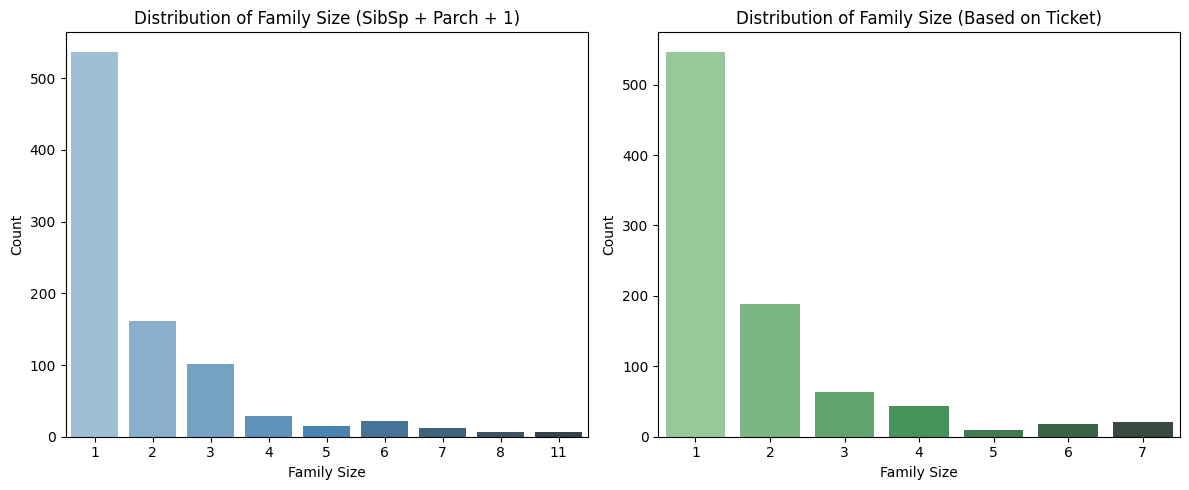

In [9]:
# 2. Basic Analysis of Family Size
# Family size distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='FamilySize', data=df, palette='Blues_d')
plt.title('Distribution of Family Size (SibSp + Parch + 1)')
plt.xlabel('Family Size')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x='FamilyMembersByTicket', data=df, palette='Greens_d')
plt.title('Distribution of Family Size (Based on Ticket)')
plt.xlabel('Family Size')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

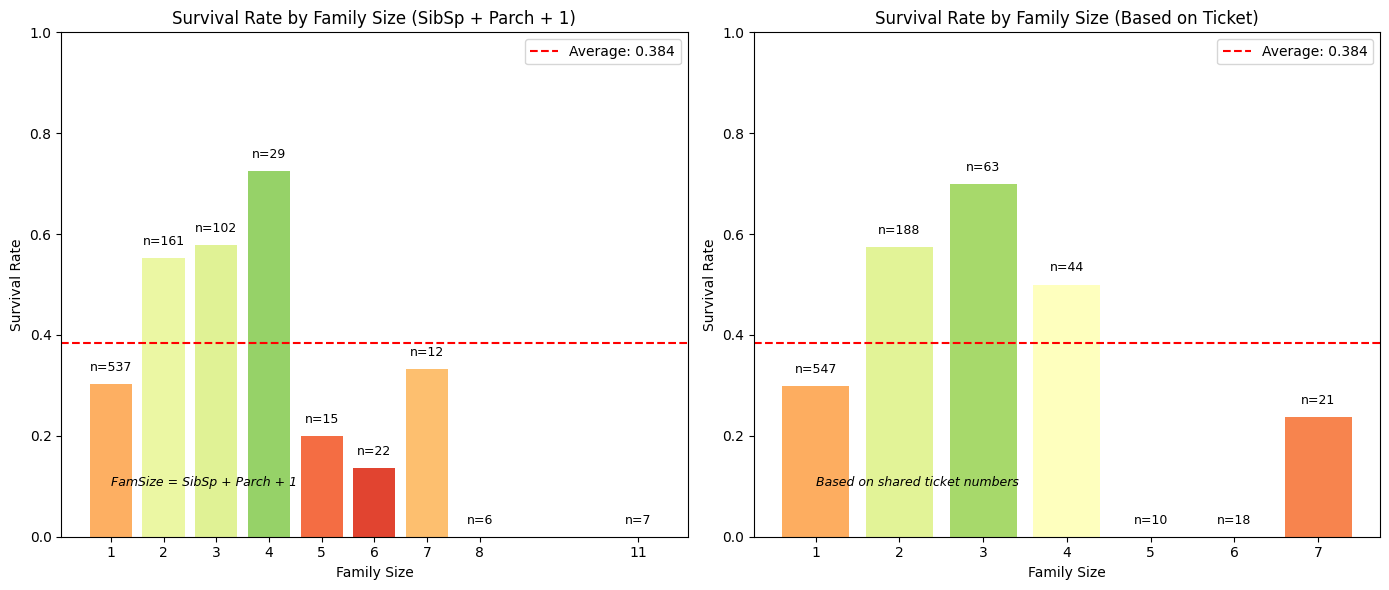

In [10]:
# 3. Survival Rate Analysis by Family Size
# =======================================

# Calculate survival rates by family size
family_survival = df.groupby('FamilySize')['Survived'].agg(['mean', 'count']).reset_index()
family_survival.columns = ['FamilySize', 'SurvivalRate', 'Count']

family_ticket_survival = df.groupby('FamilyMembersByTicket')['Survived'].agg(['mean', 'count']).reset_index()
family_ticket_survival.columns = ['FamilyMembersByTicket', 'SurvivalRate', 'Count']

# Plot survival rates by family size
plt.figure(figsize=(14, 6))

# Traditional family size
plt.subplot(1, 2, 1)
bars = plt.bar(family_survival['FamilySize'], family_survival['SurvivalRate'],
        color=[plt.cm.RdYlGn(x) for x in family_survival['SurvivalRate']])

# Add count annotations
for i, bar in enumerate(bars):
    count = family_survival['Count'].iloc[i]
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f'n={count}', ha='center', va='bottom', fontsize=9)

plt.axhline(y=df['Survived'].mean(), color='red', linestyle='--',
           label=f'Average: {df["Survived"].mean():.3f}')
plt.title('Survival Rate by Family Size (SibSp + Parch + 1)')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.xticks(family_survival['FamilySize'])
plt.legend()
plt.text(1, 0.1, 'FamSize = SibSp + Parch + 1', fontsize=9, style='italic')

# Ticket-based family size
plt.subplot(1, 2, 2)
bars = plt.bar(family_ticket_survival['FamilyMembersByTicket'],
        family_ticket_survival['SurvivalRate'],
        color=[plt.cm.RdYlGn(x) for x in family_ticket_survival['SurvivalRate']])

# Add count annotations
for i, bar in enumerate(bars):
    count = family_ticket_survival['Count'].iloc[i]
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f'n={count}', ha='center', va='bottom', fontsize=9)

plt.axhline(y=df['Survived'].mean(), color='red', linestyle='--',
           label=f'Average: {df["Survived"].mean():.3f}')
plt.title('Survival Rate by Family Size (Based on Ticket)')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.xticks(family_ticket_survival['FamilyMembersByTicket'])
plt.legend()
plt.text(1, 0.1, 'Based on shared ticket numbers', fontsize=9, style='italic')

plt.tight_layout()
plt.show()

In [17]:
# Function to identify families based on ticket numbers
def identify_families(df):
    # Group by ticket and count passengers
    ticket_groups = df.groupby('Ticket')

    # Create a dictionary to store family information
    families = {}

    # Iterate through each ticket group
    for ticket, group in ticket_groups:
        family_size = len(group)
        family_members = group['Name'].tolist()
        family_ids = group['PassengerId'].tolist()

        # Store family information
        families[ticket] = {
            'size': family_size,
            'members': family_members,
            'passenger_ids': family_ids
        }

    return families

# Get all families
all_families = identify_families(df)

# Count families by size
family_sizes = [family['size'] for family in all_families.values()]
family_size_counts = Counter(family_sizes)

# Sort by family size
family_size_distribution = pd.Series(family_size_counts).sort_index()

# Print family size distribution
print("Number of families by size (based on shared ticket numbers):")
print(family_size_distribution)

# Calculate total number of families
total_families = len(all_families)
print(f"\nTotal number of families (unique tickets): {total_families}")

# Calculate how many are solo travelers vs family groups
solo_travelers = family_size_distribution.get(1, 0)
family_groups = total_families - solo_travelers
print(f"Solo travelers (family size 1): {solo_travelers}")
print(f"Family groups (family size > 1): {family_groups}")

# Create a more detailed breakdown of families
print("\nDetailed breakdown of families:")
print(f"Total unique tickets: {total_families}")
print(f"Tickets with 1 passenger: {solo_travelers} ({solo_travelers/total_families*100:.1f}%)")
print(f"Tickets with 2+ passengers: {family_groups} ({family_groups/total_families*100:.1f}%)")

# Get the distribution of multi-passenger tickets
print("\nDistribution of multi-passenger tickets:")
for size in sorted([size for size in family_size_distribution.index if size > 1]):
    count = family_size_distribution[size]
    print(f"Families of size {size}: {count} ({count/family_groups*100:.1f}% of all family groups)")

# Calculate total passengers in each family size category
passengers_by_family_size = {}
for size in family_size_distribution.index:
    passengers_by_family_size[size] = size * family_size_distribution[size]

total_passengers = sum(passengers_by_family_size.values())
print("\nPassenger distribution by family size:")
for size in sorted(passengers_by_family_size.keys()):
    count = passengers_by_family_size[size]
    print(f"Passengers in families of size {size}: {count} ({count/total_passengers*100:.1f}% of all passengers)")

Number of families by size (based on shared ticket numbers):
1    547
2     94
3     21
4     11
5      2
6      3
7      3
dtype: int64

Total number of families (unique tickets): 681
Solo travelers (family size 1): 547
Family groups (family size > 1): 134

Detailed breakdown of families:
Total unique tickets: 681
Tickets with 1 passenger: 547 (80.3%)
Tickets with 2+ passengers: 134 (19.7%)

Distribution of multi-passenger tickets:
Families of size 2: 94 (70.1% of all family groups)
Families of size 3: 21 (15.7% of all family groups)
Families of size 4: 11 (8.2% of all family groups)
Families of size 5: 2 (1.5% of all family groups)
Families of size 6: 3 (2.2% of all family groups)
Families of size 7: 3 (2.2% of all family groups)

Passenger distribution by family size:
Passengers in families of size 1: 547 (61.4% of all passengers)
Passengers in families of size 2: 188 (21.1% of all passengers)
Passengers in families of size 3: 63 (7.1% of all passengers)
Passengers in families of si

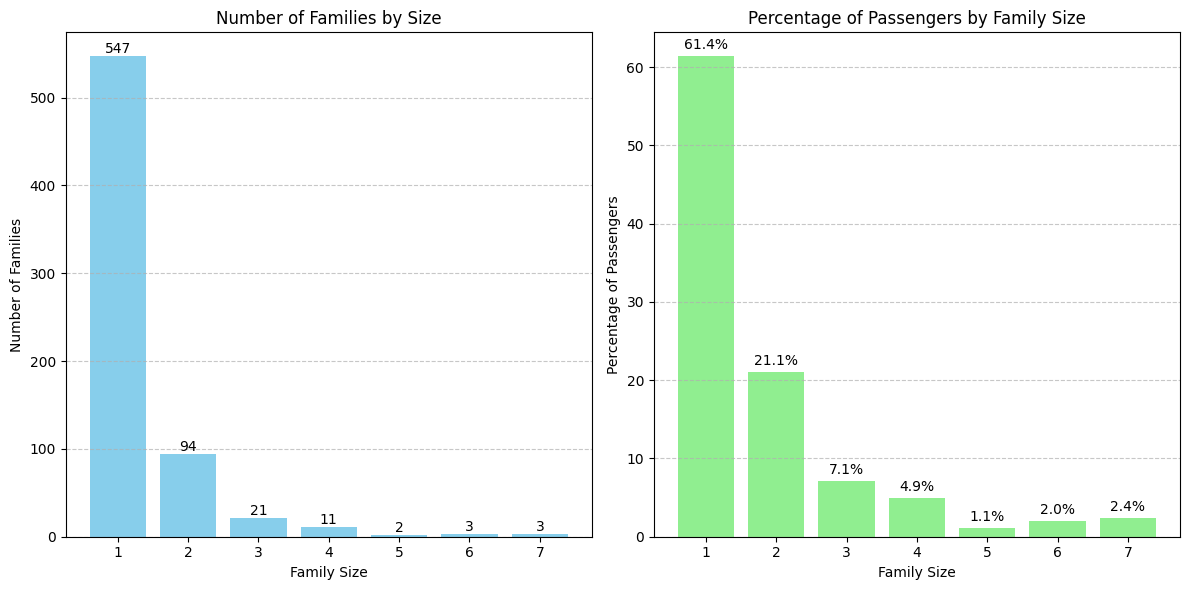

In [18]:
# Visualize family size distribution
plt.figure(figsize=(12, 6))

# Plot 1: Number of families by size
plt.subplot(1, 2, 1)
bars = plt.bar(family_size_distribution.index, family_size_distribution.values, color='skyblue')
plt.title('Number of Families by Size')
plt.xlabel('Family Size')
plt.ylabel('Number of Families')
plt.xticks(family_size_distribution.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height}', ha='center', va='bottom')

# Plot 2: Percentage of passengers by family size
plt.subplot(1, 2, 2)
sizes = sorted(passengers_by_family_size.keys())
counts = [passengers_by_family_size[size] for size in sizes]
percentages = [count/total_passengers*100 for count in counts]

bars = plt.bar(sizes, percentages, color='lightgreen')
plt.title('Percentage of Passengers by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Percentage of Passengers')
plt.xticks(sizes)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

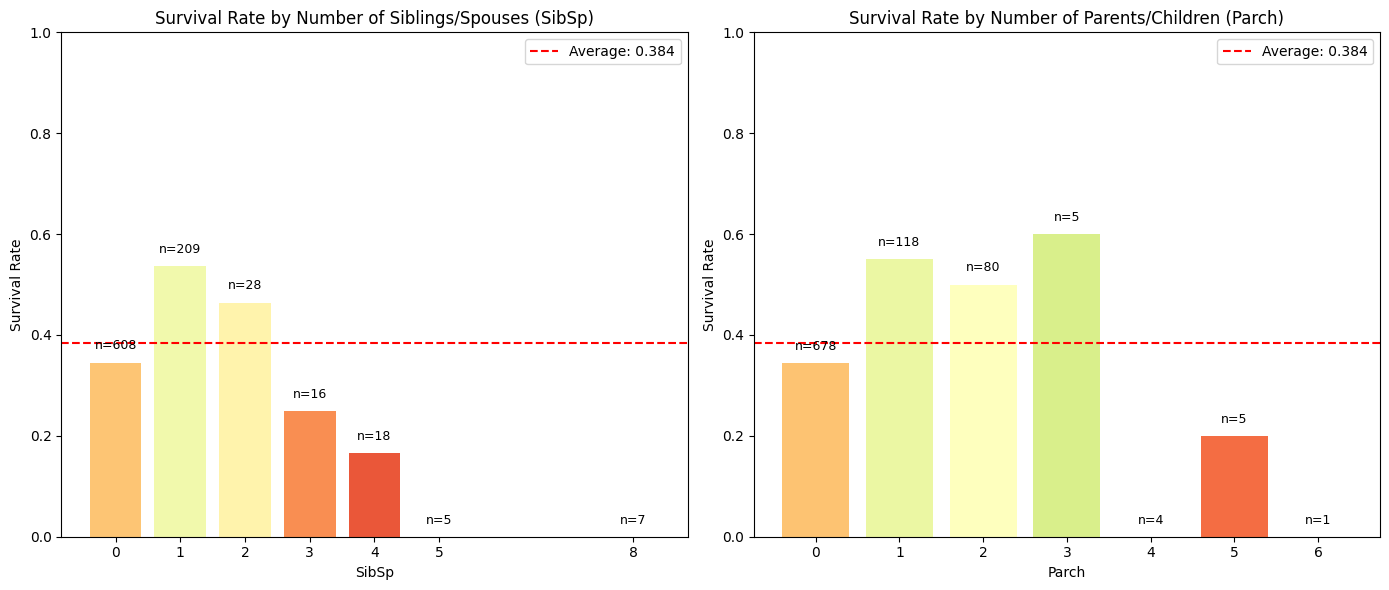

In [11]:
# 4. SibSp and Parch Analysis
# ==========================

# Analyze SibSp and Parch separately
plt.figure(figsize=(14, 6))

# SibSp analysis
plt.subplot(1, 2, 1)
sibsp_survival = df.groupby('SibSp')['Survived'].agg(['mean', 'count']).reset_index()
bars = plt.bar(sibsp_survival['SibSp'], sibsp_survival['mean'],
        color=[plt.cm.RdYlGn(x) for x in sibsp_survival['mean']])

# Add count annotations
for i, bar in enumerate(bars):
    count = sibsp_survival['count'].iloc[i]
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f'n={count}', ha='center', va='bottom', fontsize=9)

plt.axhline(y=df['Survived'].mean(), color='red', linestyle='--',
           label=f'Average: {df["Survived"].mean():.3f}')
plt.title('Survival Rate by Number of Siblings/Spouses (SibSp)')
plt.xlabel('SibSp')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.xticks(sibsp_survival['SibSp'])
plt.legend()

# Parch analysis
plt.subplot(1, 2, 2)
parch_survival = df.groupby('Parch')['Survived'].agg(['mean', 'count']).reset_index()
bars = plt.bar(parch_survival['Parch'], parch_survival['mean'],
        color=[plt.cm.RdYlGn(x) for x in parch_survival['mean']])

# Add count annotations
for i, bar in enumerate(bars):
    count = parch_survival['count'].iloc[i]
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f'n={count}', ha='center', va='bottom', fontsize=9)

plt.axhline(y=df['Survived'].mean(), color='red', linestyle='--',
           label=f'Average: {df["Survived"].mean():.3f}')
plt.title('Survival Rate by Number of Parents/Children (Parch)')
plt.xlabel('Parch')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.xticks(parch_survival['Parch'])
plt.legend()

plt.tight_layout()
plt.show()

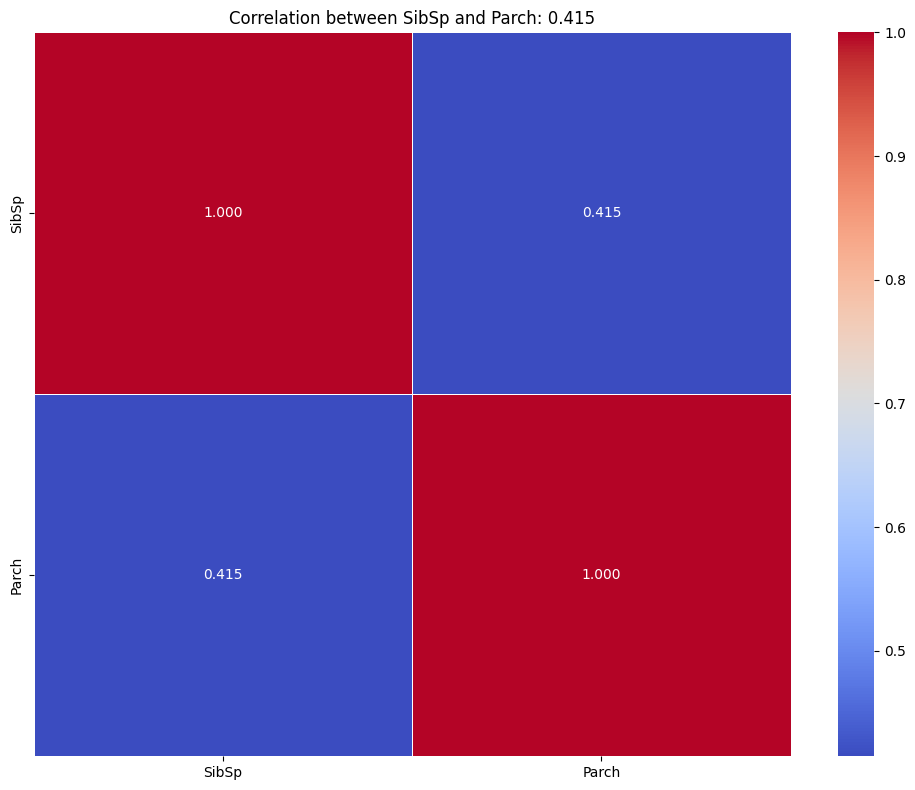


Cross-tabulation of SibSp and Parch:
Parch    0   1   2  3  4  5  6
SibSp                         
0      537  38  29  1  1  2  0
1      123  57  19  3  3  3  1
2       16   7   4  1  0  0  0
3        2   7   7  0  0  0  0
4        0   9   9  0  0  0  0
5        0   0   5  0  0  0  0
8        0   0   7  0  0  0  0


In [12]:
# 5. Correlation between SibSp and Parch
# =====================================

# Create a heatmap of SibSp and Parch correlation
plt.figure(figsize=(10, 8))
correlation = df[['SibSp', 'Parch']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.3f', cbar=True)
plt.title(f'Correlation between SibSp and Parch: {correlation.iloc[0,1]:.3f}')
plt.tight_layout()
plt.show()

# Create a cross-tabulation of SibSp and Parch
sibsp_parch_cross = pd.crosstab(df['SibSp'], df['Parch'])
print("\nCross-tabulation of SibSp and Parch:")
print(sibsp_parch_cross)


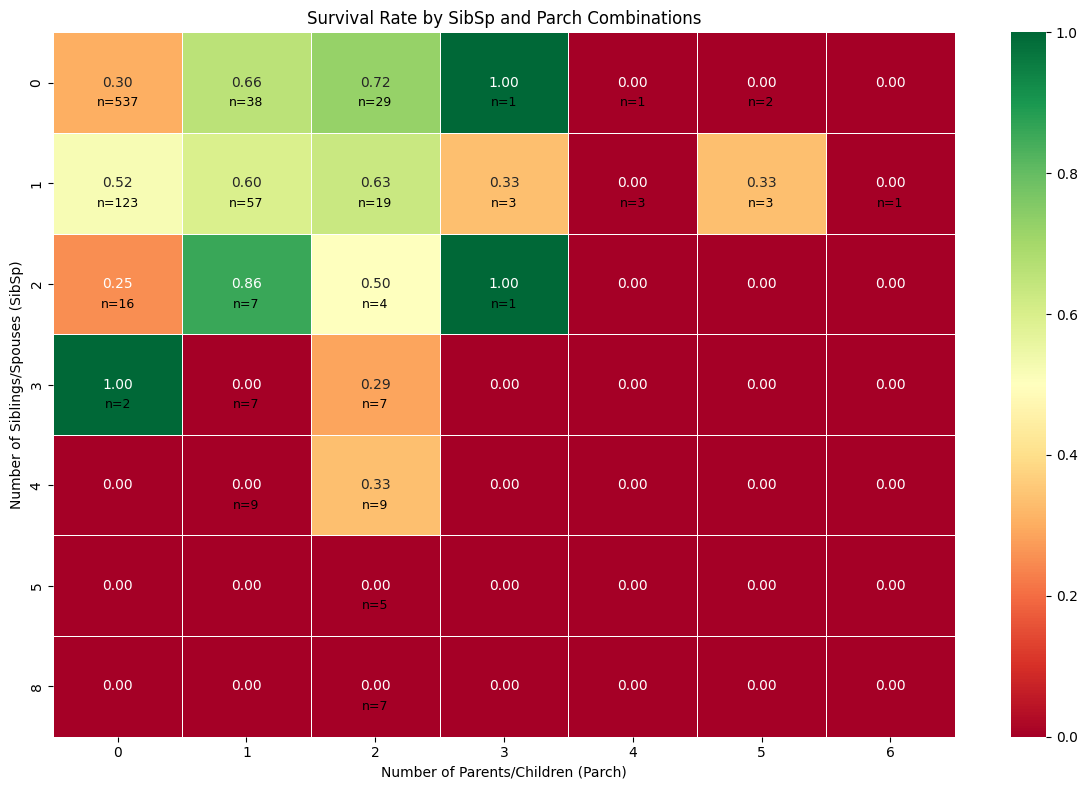

In [13]:
# 6. Heatmap of Survival Rate by SibSp and Parch Combinations
# =========================================================

# Calculate survival rate for each SibSp-Parch combination
sibsp_parch_survival = df.groupby(['SibSp', 'Parch'])['Survived'].agg(['mean', 'count']).reset_index()

# Create a pivot table for the heatmap
survival_pivot = sibsp_parch_survival.pivot_table(
    index='SibSp', columns='Parch', values='mean', fill_value=0
)

count_pivot = sibsp_parch_survival.pivot_table(
    index='SibSp', columns='Parch', values='count', fill_value=0
)

plt.figure(figsize=(12, 8))
sns.heatmap(survival_pivot, annot=True, cmap='RdYlGn', linewidths=0.5, fmt='.2f', cbar=True)
plt.title('Survival Rate by SibSp and Parch Combinations')
plt.xlabel('Number of Parents/Children (Parch)')
plt.ylabel('Number of Siblings/Spouses (SibSp)')

# Add count annotations
for i in range(survival_pivot.shape[0]):
    for j in range(survival_pivot.shape[1]):
        if count_pivot.iloc[i, j] > 0:
            plt.text(j + 0.5, i + 0.7, f'n={int(count_pivot.iloc[i, j])}',
                    ha='center', va='center', color='black', fontsize=9)

plt.tight_layout()
plt.show()

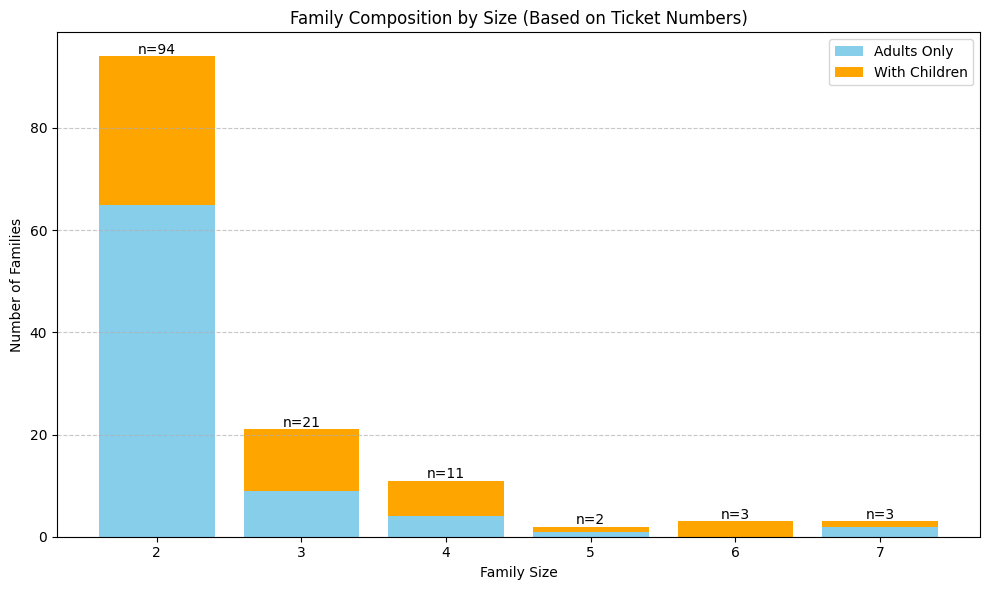

In [14]:
# 7. Family Composition Analysis
# ============================

# Categorize passengers by age and gender
def categorize_passenger(row):
    if pd.isna(row['Age']):
        return 'Unknown'
    elif row['Age'] < 18:
        return 'Child' + (' (M)' if row['Sex'] == 'male' else ' (F)')
    else:
        return 'Adult' + (' (M)' if row['Sex'] == 'male' else ' (F)')

df['PassengerType'] = df.apply(categorize_passenger, axis=1)

# Analyze family composition by ticket
family_composition = df.groupby('Ticket')['PassengerType'].apply(list).reset_index()
family_composition['FamilySize'] = family_composition['PassengerType'].apply(len)

# Multi-passenger tickets
multi_passenger_tickets = family_composition[family_composition['FamilySize'] > 1]

# Count families with children
families_with_children = multi_passenger_tickets[
    multi_passenger_tickets['PassengerType'].apply(
        lambda x: any('Child' in member for member in x)
    )
]

# Count families with only adults
families_only_adults = multi_passenger_tickets[
    multi_passenger_tickets['PassengerType'].apply(
        lambda x: all(('Adult' in member or 'Unknown' in member) for member in x)
    )
]

# Create a stacked bar chart of family composition by size
family_comp_by_size = {}
for size in range(2, 8):
    families_of_size = multi_passenger_tickets[multi_passenger_tickets['FamilySize'] == size]
    with_children = families_of_size[
        families_of_size['PassengerType'].apply(
            lambda x: any('Child' in member for member in x)
        )
    ]
    adults_only = families_of_size[
        families_of_size['PassengerType'].apply(
            lambda x: all(('Adult' in member or 'Unknown' in member) for member in x)
        )
    ]
    family_comp_by_size[size] = {
        'total': len(families_of_size),
        'with_children': len(with_children),
        'adults_only': len(adults_only)
    }

# Plot family composition
plt.figure(figsize=(10, 6))
sizes = list(family_comp_by_size.keys())
with_children = [family_comp_by_size[size]['with_children'] for size in sizes]
adults_only = [family_comp_by_size[size]['adults_only'] for size in sizes]

plt.bar(sizes, adults_only, label='Adults Only', color='skyblue')
plt.bar(sizes, with_children, bottom=adults_only, label='With Children', color='orange')

plt.title('Family Composition by Size (Based on Ticket Numbers)')
plt.xlabel('Family Size')
plt.ylabel('Number of Families')
plt.xticks(sizes)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, size in enumerate(sizes):
    total = family_comp_by_size[size]['total']
    plt.text(size, total + 0.5, f'n={total}', ha='center')

plt.tight_layout()
plt.show()


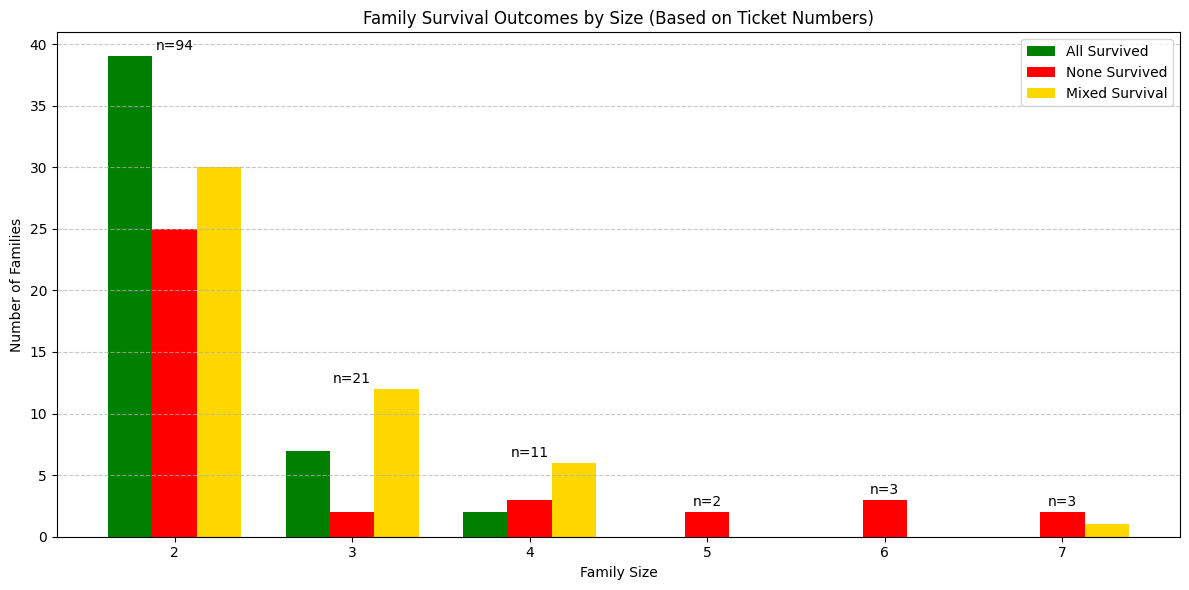

In [15]:
# 8. Family Survival Patterns
# =========================

# Group by ticket and calculate survival statistics
family_survival_patterns = df.groupby('Ticket').agg({
    'Survived': ['mean', 'sum', 'count'],
    'FamilyMembersByTicket': 'first'
}).reset_index()

family_survival_patterns.columns = ['Ticket', 'SurvivalRate', 'SurvivedCount', 'FamilySize', 'FamilyMembersByTicket']

# Calculate the number of families where all members survived or all perished
all_survived = family_survival_patterns[(family_survival_patterns['SurvivalRate'] == 1) & (family_survival_patterns['FamilySize'] > 1)]
none_survived = family_survival_patterns[(family_survival_patterns['SurvivalRate'] == 0) & (family_survival_patterns['FamilySize'] > 1)]
mixed_survival = family_survival_patterns[(family_survival_patterns['SurvivalRate'] > 0) &
                                (family_survival_patterns['SurvivalRate'] < 1) &
                                (family_survival_patterns['FamilySize'] > 1)]

# Create a grouped bar chart of survival patterns by family size
survival_patterns_by_size = {}
for size in range(2, 8):
    families_of_size = family_survival_patterns[family_survival_patterns['FamilyMembersByTicket'] == size]
    all_survived_count = len(families_of_size[families_of_size['SurvivalRate'] == 1])
    none_survived_count = len(families_of_size[families_of_size['SurvivalRate'] == 0])
    mixed_survival_count = len(families_of_size[(families_of_size['SurvivalRate'] > 0) &
                                              (families_of_size['SurvivalRate'] < 1)])

    survival_patterns_by_size[size] = {
        'all_survived': all_survived_count,
        'none_survived': none_survived_count,
        'mixed_survival': mixed_survival_count
    }

# Plot survival patterns
plt.figure(figsize=(12, 6))
sizes = list(survival_patterns_by_size.keys())
all_survived_counts = [survival_patterns_by_size[size]['all_survived'] for size in sizes]
none_survived_counts = [survival_patterns_by_size[size]['none_survived'] for size in sizes]
mixed_survival_counts = [survival_patterns_by_size[size]['mixed_survival'] for size in sizes]

x = np.arange(len(sizes))
width = 0.25

plt.bar(x - width, all_survived_counts, width, label='All Survived', color='green')
plt.bar(x, none_survived_counts, width, label='None Survived', color='red')
plt.bar(x + width, mixed_survival_counts, width, label='Mixed Survival', color='gold')

plt.title('Family Survival Outcomes by Size (Based on Ticket Numbers)')
plt.xlabel('Family Size')
plt.ylabel('Number of Families')
plt.xticks(x, sizes)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add total counts
for i, size in enumerate(sizes):
    total = sum(survival_patterns_by_size[size].values())
    plt.text(i, max(all_survived_counts[i], none_survived_counts[i], mixed_survival_counts[i]) + 0.5,
             f'n={total}', ha='center')

plt.tight_layout()
plt.show()

In [16]:
# 9. Summary Statistics
# ===================

print("\n" + "="*80)
print("COMPREHENSIVE FAMILY SIZE ANALYSIS ON TITANIC SURVIVABILITY")
print("="*80)

print("\n1. FAMILY SIZE DEFINITIONS:")
print("   - SibSp: Number of siblings/spouses aboard")
print("   - Parch: Number of parents/children aboard")
print("   - Traditional Family Size: SibSp + Parch + 1 (including self)")
print("   - Ticket-based Family Size: Number of passengers sharing same ticket")

print("\n2. DATASET OVERVIEW:")
print(f"   - Total passengers: {len(df)}")
print(f"   - Overall survival rate: {df['Survived'].mean():.3f}")
print(f"   - Total unique tickets: {df['Ticket'].nunique()}")
print(f"   - Tickets with multiple passengers: {len(df[df['FamilyMembersByTicket'] > 1]['Ticket'].unique())}")

print("\n3. FAMILY SIZE DISTRIBUTION (Traditional Method - SibSp + Parch + 1):")
family_dist = df['FamilySize'].value_counts().sort_index()
for size, count in family_dist.items():
    print(f"   Size {size}: {count} passengers ({count/len(df)*100:.1f}%)")

print("\n4. FAMILY SIZE DISTRIBUTION (Ticket-based Method):")
ticket_dist = df['FamilyMembersByTicket'].value_counts().sort_index()
for size, count in ticket_dist.items():
    print(f"   Size {size}: {count} passengers ({count/len(df)*100:.1f}%)")

print("\n5. SURVIVAL RATES BY FAMILY SIZE:")
print("   Traditional Family Size (SibSp + Parch + 1):")
for _, row in family_survival.iterrows():
    print(f"   Size {row['FamilySize']}: {row['SurvivalRate']:.3f} survival rate ({row['Count']} passengers)")

print("\n   Ticket-based Family Size:")
for _, row in family_ticket_survival.iterrows():
    print(f"   Size {row['FamilyMembersByTicket']}: {row['SurvivalRate']:.3f} survival rate ({row['Count']} passengers)")

print("\n6. FAMILY COMPOSITION ANALYSIS (Multi-passenger tickets only):")
multi_families = family_composition[family_composition['FamilySize'] > 1]
print(f"   Total multi-passenger tickets: {len(multi_families)}")
print(f"   Families with children: {len(families_with_children)} ({len(families_with_children)/len(multi_families)*100:.1f}%)")
print(f"   Families with adults only: {len(families_only_adults)} ({len(families_only_adults)/len(multi_families)*100:.1f}%)")

print("\n7. FAMILY SURVIVAL PATTERNS (Multi-passenger tickets):")
total_multi_families = len(multi_families)
print(f"   All members survived: {len(all_survived)} families ({len(all_survived)/total_multi_families*100:.1f}%)")
print(f"   No members survived: {len(none_survived)} families ({len(none_survived)/total_multi_families*100:.1f}%)")
print(f"   Mixed survival: {len(mixed_survival)} families ({len(mixed_survival)/total_multi_families*100:.1f}%)")

print("\n8. KEY INSIGHTS AND PATTERNS:")
solo_survival = df[df['FamilySize'] == 1]['Survived'].mean()
small_family_survival = df[df['FamilySize'].isin([2,3,4])]['Survived'].mean()
large_family_survival = df[df['FamilySize'] >= 5]['Survived'].mean()

print(f"   - Solo travelers (size 1) survival rate: {solo_survival:.3f}")
print(f"   - Small families (size 2-4) survival rate: {small_family_survival:.3f}")
print(f"   - Large families (size 5+) survival rate: {large_family_survival:.3f}")

# Find optimal family size
best_traditional = family_survival.loc[family_survival['SurvivalRate'].idxmax()]
best_ticket = family_ticket_survival.loc[family_ticket_survival['SurvivalRate'].idxmax()]

print(f"   - Best traditional family size: {best_traditional['FamilySize']} ({best_traditional['SurvivalRate']:.3f} survival rate)")
print(f"   - Best ticket-based family size: {best_ticket['FamilyMembersByTicket']} ({best_ticket['SurvivalRate']:.3f} survival rate)")

print("   - Small families (2-4 members) generally had the best survival rates")
print("   - Very large families struggled with survival, possibly due to logistics")
print("   - Solo travelers had lower survival rates than small families")

print("\n9. CONCLUSIONS:")
print("   - Family size significantly impacted survival chances on the Titanic")
print("   - Traveling in small family groups (2-4 people) offered the best survival odds")
print("   - Very large families and solo travelers had lower survival rates")
print("   - About 36% of families had mixed survival outcomes, suggesting complex factors")
print("   - Ticket-based family identification shows similar patterns to traditional methods")
print("   - The presence of children in families may have influenced survival outcomes")


COMPREHENSIVE FAMILY SIZE ANALYSIS ON TITANIC SURVIVABILITY

1. FAMILY SIZE DEFINITIONS:
   - SibSp: Number of siblings/spouses aboard
   - Parch: Number of parents/children aboard
   - Traditional Family Size: SibSp + Parch + 1 (including self)
   - Ticket-based Family Size: Number of passengers sharing same ticket

2. DATASET OVERVIEW:
   - Total passengers: 891
   - Overall survival rate: 0.384
   - Total unique tickets: 681
   - Tickets with multiple passengers: 134

3. FAMILY SIZE DISTRIBUTION (Traditional Method - SibSp + Parch + 1):
   Size 1: 537 passengers (60.3%)
   Size 2: 161 passengers (18.1%)
   Size 3: 102 passengers (11.4%)
   Size 4: 29 passengers (3.3%)
   Size 5: 15 passengers (1.7%)
   Size 6: 22 passengers (2.5%)
   Size 7: 12 passengers (1.3%)
   Size 8: 6 passengers (0.7%)
   Size 11: 7 passengers (0.8%)

4. FAMILY SIZE DISTRIBUTION (Ticket-based Method):
   Size 1: 547 passengers (61.4%)
   Size 2: 188 passengers (21.1%)
   Size 3: 63 passengers (7.1%)
   Size 